# Pandas Homework with IMDb data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# BASIC LEVEL

### read in 'imdb_1000.csv' and store it in a DataFrame named movies

In [6]:
movies=pd.read_csv("http://bit.ly/imdbratings")
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


### #check the number of rows and columns

In [3]:
movies.shape

(979, 6)

### check the data type of each column

In [5]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

### calculate the average movie duration

In [14]:
res=round((movies.duration.mean()/60) ,2)
str(res)+'hrs'

'2.02hrs'

### sort the DataFrame by duration to find the shortest and longest movies

In [16]:
result=movies.sort_values('duration')
result.head(1)
result.tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


### create a histogram of duration, choosing an "appropriate" number of bins

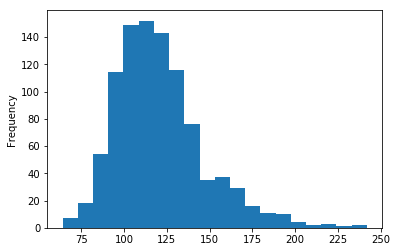

In [18]:
movies.duration.plot(kind='hist',bins=20)

### use a box plot to display that same data

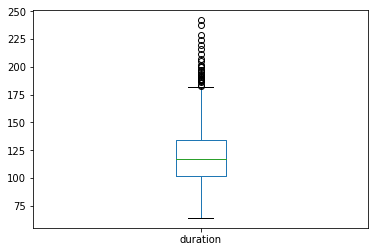

In [21]:
movies.duration.plot(kind='box')

### count how many movies have each of the content ratings

In [22]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

### use a visualization to display that same data, including a title and x and y labels

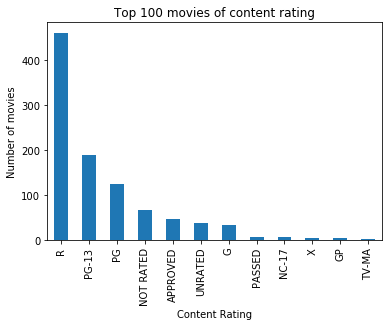

In [24]:
movies.content_rating.value_counts().plot(kind='bar',title='Top 100 movies of content rating')
plt.xlabel("Content Rating")
plt.ylabel("Number of movies")

### convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP

In [27]:
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'],'UNRATED',inplace=True)

### convert the following content ratings to "NC-17": X, TV-MA

In [29]:
movies.content_rating.replace(['X', 'TV-MA'],'NC-17',inplace=True)

### count the number of missing values in each column

In [30]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

### if there are missing values: examine them, then fill them in with "reasonable" values

In [35]:
movies[movies.content_rating.isnull()]
movies.content_rating.fillna('UNRATED',inplace=True)

### calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours

In [38]:
movies[movies.duration>=120].star_rating.mean()
movies[movies.duration<120].star_rating.mean()

7.838666666666657

### use a visualization to detect whether there is a relationship between duration and star rating

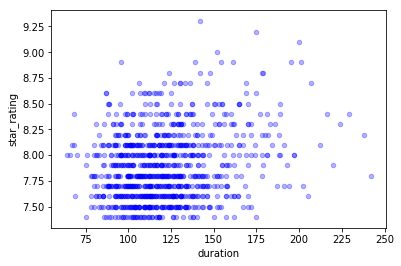

In [46]:
movies.plot(kind='scatter',x='duration',y='star_rating',alpha=0.3,c='blue')

### calculate the average duration for each genre

In [47]:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

### visualize the relationship between content rating and duration

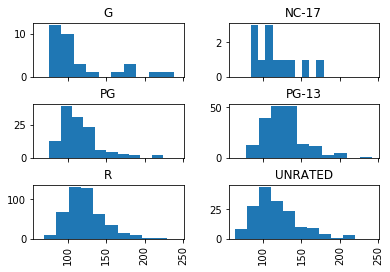

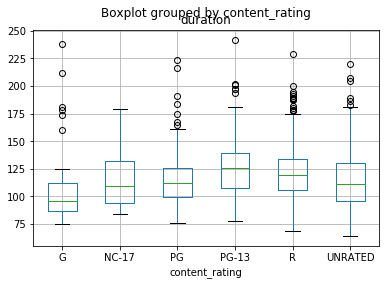

In [51]:
movies.hist(column='duration',by='content_rating',sharex=True)
movies.boxplot(column='duration',by='content_rating')

### determine the top rated movie (by star rating) for each genre

In [63]:
movies.sort_values('star_rating',ascending=False).groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

### check if there are multiple movies with the same title, and if so, determine if they are actually duplicates

In [65]:
duptitle=movies[movies.title.duplicated()].title
movies[movies.title.isin(duptitle)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


### calculate the average star rating for each genre, but only include genres with at least 10 movies

### option 1: manually create a list of relevant genres, then filter using that list

In [83]:
movies.genre.value_counts()
top_genres=['Drama','Comedy','Crime','Biography','Adventure','Animation','Horror','Mystery']
movies[movies.genre.isin(top_genres)].groupby('genre').star_rating.mean()

genre
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

### option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [90]:
genrec=movies.genre.value_counts()
top_genres=genrec[genrec>9].index
movies[movies.genre.isin(top_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

### option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [92]:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts()>=10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

### option 4: aggregate by count and mean, then filter using the count

In [98]:
res=movies.groupby('genre').star_rating.agg(['count','mean'])
res[res['count']>9]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000
